In [1]:
%matplotlib inline
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

In [39]:
p1 = cv2.imread('a.jpg', 0)
p2 = cv2.imread('b.jpg', 0)
p3 = cv2.imread('c.jpg', 0)
p4 = cv2.imread('4.png', 0)
p5 = cv2.imread('5.png', 0)
bird = cv2.imread('bird.png', 0)
w, h = bird.shape[::-1]

In [7]:
print p3.shape
print len(p3[0])

(557L, 306L)
306


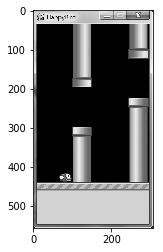

In [5]:
plt.imshow(p3,cmap = 'gray')

In [16]:
print p2

[[197  76  60 ..., 134 149 165]
 [127 159 138 ..., 107 129 143]
 [ 66  63  15 ...,  22 104 130]
 ..., 
 [ 65  53  17 ...,  13  40  54]
 [ 77  64  50 ...,  41  53  63]
 [ 81  73  64 ...,  54  63  68]]


In [17]:
print bird.shape
w, h = bird.shape[::-1]

(24L, 34L)


1562716.875 (257, 403)


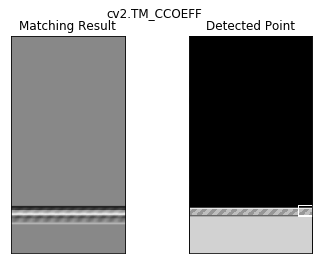

0.333209097385 (257, 425)


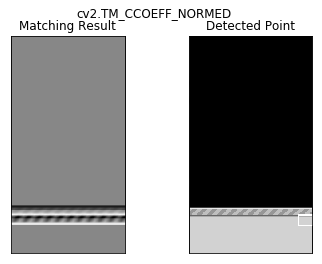

16317003.0 (209, 429)


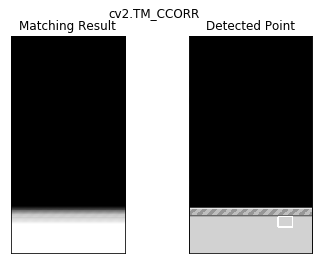

0.778297543526 (257, 425)


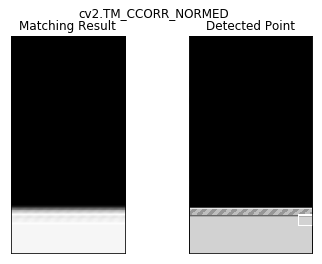

7816656.0 (1, 403)


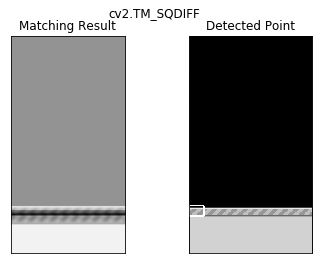

0.496222615242 (1, 405)


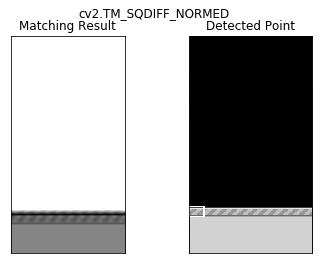

In [19]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = p4.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(p4, bird, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
        print min_val,
    else:
        print max_val,
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    print top_left

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [13]:
p1[416][66]

0

In [14]:
print p1

[[195  78  60 ..., 136 150 162]
 [129 156 139 ..., 104 129 146]
 [ 67  59  18 ...,  24 104 129]
 ..., 
 [ 69  51  15 ...,  15  39  56]
 [ 75  65  51 ...,  39  54  62]
 [ 81  73  65 ...,  55  62  67]]


In [61]:
p1.shape

(536L, 290L, 3L)

In [62]:
np.array_equal(p1, p2)

False

In [63]:
np.array_equal(p2, p3)

False

In [64]:
c = np.count_nonzero(np.asarray(p2) - np.asarray(p3))

In [65]:
print c

10071


In [67]:
t = np.asarray(p1) - np.asarray(p2)

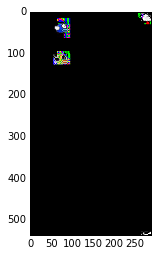

In [71]:
plt.imshow(t)

In [27]:
from PIL import ImageGrab
rangle = (14, 42, 303, 535)
t = ImageGrab.grab(rangle)

In [28]:
b = np.asarray(t)
a = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY) 

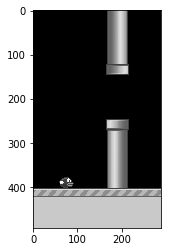

In [29]:
plt.imshow(a,cmap = 'gray')

In [33]:
print a.shape
print len(a)

(493L, 289L)
493


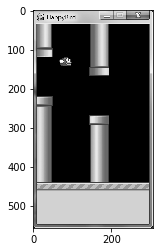

In [35]:
plt.imshow(p1,cmap = 'gray')

In [42]:
print np.sum(p2-p3)

0


In [19]:
len(p1) == len(p2)

TypeError: object of type 'NoneType' has no len()

In [65]:
# coding: utf-8
import math
import time
import cv2
import numpy as np
import win32api
import win32con
from PIL import ImageGrab

class FlappyBirdPlayer:

    def __init__(self):
        self.template = cv2.imread('bird.png', 0)

    def act(self, hld):
        win32api.SendMessage(hld, win32con.WM_KEYDOWN, win32con.VK_UP, 0)
        win32api.SendMessage(hld, win32con.WM_KEYUP, win32con.VK_UP, 0)

    def wait_restart(self, a, b, rangle):
        now = time.time()
        while True:
            if np.array_equal(a, b):
                self.live_time = now
                return
            time.sleep(0.01)
            a = b
            b = ImageGrab.grab(rangle)

    def findBirdY(self, img):
        res = cv2.matchTemplate(img , self.template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        return max_loc, max_val
    
    def isCrash(self, img, x, y):

        if img[x][y-1] > 10:
            return True
        if img[x+24][y-1] > 10:
            return True
        if img[x+23][y+34] > 10:
            return True
        if img[x+24][y+33] > 10:
            return True
        if img[x+23][y] > 10:
            return True
        if img[x-1][y] > 10:
            return True
        if img[x-1][y+34] > 10:
            return True
        if img[x][y+34] > 10:
            return True
        return False

    def checkTerminal(self, img):
        #img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
        #reward = 0.2 /(1+math.exp(-lasting))
        reward = 0.1
        loc, val = self.findBirdY(img)
        terminal = False
        x, y = loc
        if self.isCrash(img, y, x):
            terminal = True

        pipe_y = 1
        if y < 2:
            pipe_y = 35
        
        w = len(img[0])
        print img.shape, pipe_y, w, x, val, terminal
        for i in range(10, w-10):
            print img[pipe_y][i-1] < 10 and img[pipe_y][i] > 10
            if img[pipe_y][i-1] < 10 and img[pipe_y][i] > 10\
                    and i < x + 34:
                reward = 1
                print reward,

        if val < 0.5 or terminal:            
            reward = -1

        return reward, terminal


In [66]:
player = FlappyBirdPlayer()
p5 = cv2.imread('5.png', 0)
player.checkTerminal(p5)

(499L, 284L) 1 284 56 0.868472993374 False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

(0.1, False)

In [23]:
print player.checkTerminal(p2)
print player.checkTerminal(p3)

147 89
(-1, True)
416 66
(-1, True)


In [ ]:
player.checkTerminal(p1)

In [44]:
player.checkTerminal(a)

388 58


(-1, True)

In [50]:
p1 = cv2.imread('../images/subtract-7.jpg')
p2 = cv2.imread('../images/subtract-7-1.jpg')
p3 = cv2.imread('../images/subtract-7-2.jpg')
p4 = cv2.imread('../images/subtract-7-3.jpg')

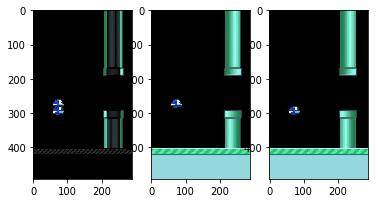

In [16]:
pl1 = plt.subplot(1,3,1)
pl1.imshow(p1)
pl2 = plt.subplot(1,3,2)
pl2.imshow(p2)
pl3 = plt.subplot(1,3,3)
pl3.imshow(p3)

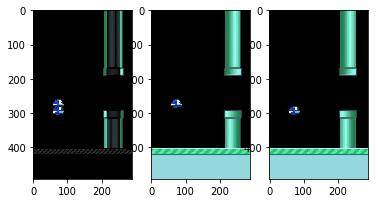

In [18]:
pl1 = plt.subplot(1,3,1)
pl1.imshow(p1)
pl2 = plt.subplot(1,3,2)
pl2.imshow(p2)
pl3 = plt.subplot(1,3,3)
pl3.imshow(p3)

In [42]:
p3.shape

(493L, 288L, 3L)

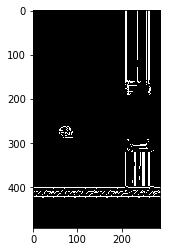

In [52]:
canny = cv2.Canny(p2, 10, 150)
plt.imshow(canny,cmap = 'gray')

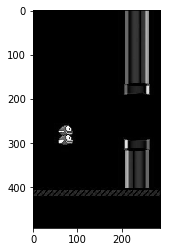

In [20]:
gray = cv2.cvtColor(p1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap = 'gray')

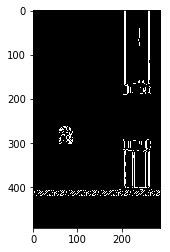

In [23]:
canny = cv2.Canny(gray, 10, 150)
plt.imshow(canny,cmap = 'gray')

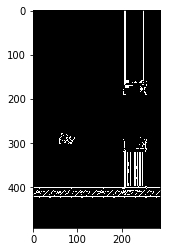

In [53]:
canny = cv2.Canny(p3, 30, 160)
plt.imshow(canny,cmap = 'gray')

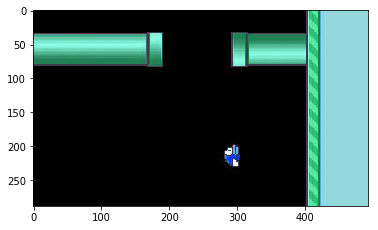

In [47]:
from PIL import Image
rp = Image.fromarray(p3).transpose(Image.ROTATE_90)
plt.imshow(rp)

In [45]:
#rp = np.asarray(rp, dtype="int16")
#rp.shape

(288L, 493L, 3L)

In [49]:
gray = cv2.cvtColor(rp, cv2.COLOR_BGR2GRAY)

TypeError: src is not a numpy array, neither a scalar

In [48]:

#print rp.shape
canny = cv2.Canny(rp, 30, 170)
plt.imshow(canny,cmap = 'gray')

TypeError: Required argument 'threshold2' (pos 4) not found